# Keras - NN(Neural Network)

## 공통 코드

In [1]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "keras_multilayer_perceptron"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action='ignore')

## 설치 확인

In [4]:
import tensorflow as tf
from tensorflow import keras

print('텐서 플로 버전:', tf.__version__)
#print('케라스 버전:', keras.__version__)

텐서 플로 버전: 2.13.0


## Keras - DNN(Neural Network)

### 단순 신경망 훈련 - 선형 회귀

#### 샘플 데이터 생성

In [ ]:
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


#### 데이터 시각화

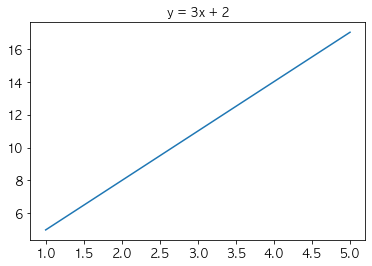

In [ ]:
# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

#### 모델 구조

In [ ]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 입력 데이터 형태

In [ ]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

#### 단순 회귀 모델 정의

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#### 모델의 요약

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### 컴파일

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### 훈련

In [ ]:
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 280ms/step - loss: 42.8898 - mae: 6.2370
Epoch 2/1200
1/1 [==============================] - 0s 3ms/step - loss: 25.1608 - mae: 4.8201
Epoch 3/1200
1/1 [==============================] - 0s 3ms/step - loss: 14.8282 - mae: 3.7383
Epoch 4/1200
1/1 [==============================] - 0s 3ms/step - loss: 8.8057 - mae: 2.9123
Epoch 5/1200
1/1 [==============================] - 0s 2ms/step - loss: 5.2950 - mae: 2.2815
Epoch 6/1200
1/1 [==============================] - 0s 3ms/step - loss: 3.2480 - mae: 1.7998
Epoch 7/1200
1/1 [==============================] - 0s 5ms/step - loss: 2.0540 - mae: 1.4318
Epoch 8/1200
1/1 [==============================] - 0s 3ms/step - loss: 1.3572 - mae: 1.1508
Epoch 9/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.9500 - mae: 0.9360
Epoch 10/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.7116 - mae: 0.7719
Epoch 11/1200
1/1 [==============================] - 0s 4ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.2254 - mae: 0.4075
Epoch 89/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.2239 - mae: 0.4061
Epoch 90/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.2224 - mae: 0.4048
Epoch 91/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.2209 - mae: 0.4034
Epoch 92/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.2194 - mae: 0.4020
Epoch 93/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.2179 - mae: 0.4007
Epoch 94/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.2164 - mae: 0.3993
Epoch 95/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.2150 - mae: 0.3980
Epoch 96/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.2135 - mae: 0.3966
Epoch 97/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.2121 - mae: 0.3953
Epoch 98/1200
1/1 [==============================] - 0s 3ms/step - loss: 0

1/1 [==============================] - 0s 3ms/step - loss: 0.1259 - mae: 0.3045
Epoch 175/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.1250 - mae: 0.3035
Epoch 176/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.1242 - mae: 0.3025
Epoch 177/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.1234 - mae: 0.3015
Epoch 178/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.1225 - mae: 0.3005
Epoch 179/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.1217 - mae: 0.2994
Epoch 180/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.1209 - mae: 0.2984
Epoch 181/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.1201 - mae: 0.2974
Epoch 182/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.1193 - mae: 0.2964
Epoch 183/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.1185 - mae: 0.2954
Epoch 184/1200
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.2276
Epoch 261/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0698 - mae: 0.2268
Epoch 262/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0694 - mae: 0.2261
Epoch 263/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0689 - mae: 0.2253
Epoch 264/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0684 - mae: 0.2245
Epoch 265/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0680 - mae: 0.2238
Epoch 266/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0675 - mae: 0.2230
Epoch 267/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0671 - mae: 0.2223
Epoch 268/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0666 - mae: 0.2215
Epoch 269/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0662 - mae: 0.2208
Epoch 270/1200
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0393 - mae: 0.1701
Epoch 347/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0390 - mae: 0.1695
Epoch 348/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0387 - mae: 0.1689
Epoch 349/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0385 - mae: 0.1684
Epoch 350/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0382 - mae: 0.1678
Epoch 351/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1672
Epoch 352/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0377 - mae: 0.1667
Epoch 353/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0375 - mae: 0.1661
Epoch 354/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0372 - mae: 0.1655
Epoch 355/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0369 - mae: 0.1650
Epoch 356/1200
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0219 - mae: 0.1271
Epoch 433/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0218 - mae: 0.1267
Epoch 434/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0216 - mae: 0.1263
Epoch 435/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0215 - mae: 0.1258
Epoch 436/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0213 - mae: 0.1254
Epoch 437/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0212 - mae: 0.1250
Epoch 438/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0211 - mae: 0.1246
Epoch 439/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0209 - mae: 0.1241
Epoch 440/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0208 - mae: 0.1237
Epoch 441/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0206 - mae: 0.1233
Epoch 442/1200
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0122 - mae: 0.0950
Epoch 519/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0122 - mae: 0.0947
Epoch 520/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0121 - mae: 0.0944
Epoch 521/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0940
Epoch 522/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0119 - mae: 0.0937
Epoch 523/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0118 - mae: 0.0934
Epoch 524/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0931
Epoch 525/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0928
Epoch 526/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0925
Epoch 527/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0115 - mae: 0.0921
Epoch 528/1200
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0068 - mae: 0.0710
Epoch 605/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0068 - mae: 0.0708
Epoch 606/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0067 - mae: 0.0705
Epoch 607/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0067 - mae: 0.0703
Epoch 608/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0067 - mae: 0.0700
Epoch 609/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0066 - mae: 0.0698
Epoch 610/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0066 - mae: 0.0696
Epoch 611/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.0065 - mae: 0.0693
Epoch 612/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.0065 - mae: 0.0691
Epoch 613/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0689
Epoch 614/1200
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0038 - mae: 0.0531
Epoch 691/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0529
Epoch 692/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0038 - mae: 0.0527
Epoch 693/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0037 - mae: 0.0525
Epoch 694/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0523
Epoch 695/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0522
Epoch 696/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0037 - mae: 0.0520
Epoch 697/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0518
Epoch 698/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0036 - mae: 0.0516
Epoch 699/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0515
Epoch 700/1200
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0396
Epoch 777/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0395
Epoch 778/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0394
Epoch 779/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0392
Epoch 780/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0391
Epoch 781/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - mae: 0.0390
Epoch 782/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0389
Epoch 783/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0020 - mae: 0.0387
Epoch 784/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0020 - mae: 0.0386
Epoch 785/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0020 - mae: 0.0385
Epoch 786/1200
1/1 [==============================] - 0s 4ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0296
Epoch 863/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mae: 0.0295
Epoch 864/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mae: 0.0294
Epoch 865/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mae: 0.0293
Epoch 866/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0292
Epoch 867/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0291
Epoch 868/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0290
Epoch 869/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0289
Epoch 870/1200
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mae: 0.0288
Epoch 871/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0287
Epoch 872/1200
1/1 [==============================] - 0s 2ms/step

Epoch 946/1200
1/1 [==============================] - 0s 3ms/step - loss: 6.7464e-04 - mae: 0.0223
Epoch 947/1200
1/1 [==============================] - 0s 3ms/step - loss: 6.7008e-04 - mae: 0.0222
Epoch 948/1200
1/1 [==============================] - 0s 2ms/step - loss: 6.6556e-04 - mae: 0.0221
Epoch 949/1200
1/1 [==============================] - 0s 4ms/step - loss: 6.6108e-04 - mae: 0.0221
Epoch 950/1200
1/1 [==============================] - 0s 2ms/step - loss: 6.5661e-04 - mae: 0.0220
Epoch 951/1200
1/1 [==============================] - 0s 4ms/step - loss: 6.5218e-04 - mae: 0.0219
Epoch 952/1200
1/1 [==============================] - 0s 3ms/step - loss: 6.4777e-04 - mae: 0.0218
Epoch 953/1200
1/1 [==============================] - 0s 4ms/step - loss: 6.4341e-04 - mae: 0.0218
Epoch 954/1200
1/1 [==============================] - 0s 4ms/step - loss: 6.3906e-04 - mae: 0.0217
Epoch 955/1200
1/1 [==============================] - 0s 3ms/step - loss: 6.3474e-04 - mae: 0.0216
Epoch 956/

1/1 [==============================] - 0s 2ms/step - loss: 3.8713e-04 - mae: 0.0169
Epoch 1029/1200
1/1 [==============================] - 0s 2ms/step - loss: 3.8452e-04 - mae: 0.0168
Epoch 1030/1200
1/1 [==============================] - 0s 2ms/step - loss: 3.8192e-04 - mae: 0.0168
Epoch 1031/1200
1/1 [==============================] - 0s 4ms/step - loss: 3.7934e-04 - mae: 0.0167
Epoch 1032/1200
1/1 [==============================] - 0s 3ms/step - loss: 3.7678e-04 - mae: 0.0167
Epoch 1033/1200
1/1 [==============================] - 0s 2ms/step - loss: 3.7424e-04 - mae: 0.0166
Epoch 1034/1200
1/1 [==============================] - 0s 2ms/step - loss: 3.7171e-04 - mae: 0.0165
Epoch 1035/1200
1/1 [==============================] - 0s 3ms/step - loss: 3.6919e-04 - mae: 0.0165
Epoch 1036/1200
1/1 [==============================] - 0s 3ms/step - loss: 3.6671e-04 - mae: 0.0164
Epoch 1037/1200
1/1 [==============================] - 0s 3ms/step - loss: 3.6422e-04 - mae: 0.0164
Epoch 1038/1200


1/1 [==============================] - 0s 3ms/step - loss: 2.2214e-04 - mae: 0.0128
Epoch 1111/1200
1/1 [==============================] - 0s 3ms/step - loss: 2.2064e-04 - mae: 0.0127
Epoch 1112/1200
1/1 [==============================] - 0s 3ms/step - loss: 2.1915e-04 - mae: 0.0127
Epoch 1113/1200
1/1 [==============================] - 0s 2ms/step - loss: 2.1768e-04 - mae: 0.0127
Epoch 1114/1200
1/1 [==============================] - 0s 3ms/step - loss: 2.1621e-04 - mae: 0.0126
Epoch 1115/1200
1/1 [==============================] - 0s 3ms/step - loss: 2.1475e-04 - mae: 0.0126
Epoch 1116/1200
1/1 [==============================] - 0s 2ms/step - loss: 2.1330e-04 - mae: 0.0125
Epoch 1117/1200
1/1 [==============================] - 0s 3ms/step - loss: 2.1186e-04 - mae: 0.0125
Epoch 1118/1200
1/1 [==============================] - 0s 3ms/step - loss: 2.1043e-04 - mae: 0.0125
Epoch 1119/1200
1/1 [==============================] - 0s 3ms/step - loss: 2.0900e-04 - mae: 0.0124
Epoch 1120/1200


1/1 [==============================] - 0s 3ms/step - loss: 1.2748e-04 - mae: 0.0097
Epoch 1193/1200
1/1 [==============================] - 0s 2ms/step - loss: 1.2661e-04 - mae: 0.0097
Epoch 1194/1200
1/1 [==============================] - 0s 3ms/step - loss: 1.2576e-04 - mae: 0.0096
Epoch 1195/1200
1/1 [==============================] - 0s 2ms/step - loss: 1.2491e-04 - mae: 0.0096
Epoch 1196/1200
1/1 [==============================] - 0s 2ms/step - loss: 1.2407e-04 - mae: 0.0096
Epoch 1197/1200
1/1 [==============================] - 0s 3ms/step - loss: 1.2323e-04 - mae: 0.0095
Epoch 1198/1200
1/1 [==============================] - 0s 2ms/step - loss: 1.2241e-04 - mae: 0.0095
Epoch 1199/1200
1/1 [==============================] - 0s 2ms/step - loss: 1.2158e-04 - mae: 0.0095
Epoch 1200/1200
1/1 [==============================] - 0s 3ms/step - loss: 1.2076e-04 - mae: 0.0094


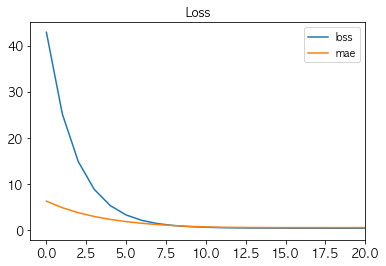

In [ ]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

#### 검증

In [ ]:
model.evaluate(x, y)

1/1 [==============================] - 0s 74ms/step - loss: 1.1995e-04 - mae: 0.0094


[0.00011994701344519854, 0.009400462731719017]

#### 예측

In [ ]:
model.predict([10])

array([[32.045433]], dtype=float32)

### Sequential API 를 사용하여 이미지 분류기 만들기

#### 패션 MNIST 데이터 가져오기

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### 훈련 데이터 확인

In [6]:
print('데이터 구조:', X_train_full.shape)

print('데이터 타입:', X_train_full.dtype)

데이터 구조: (60000, 28, 28)
데이터 타입: uint8


### 훈련 데이터 와 테스트 데이터를 나누고 0~1 사이로 스케일링

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#### 이미지 출력

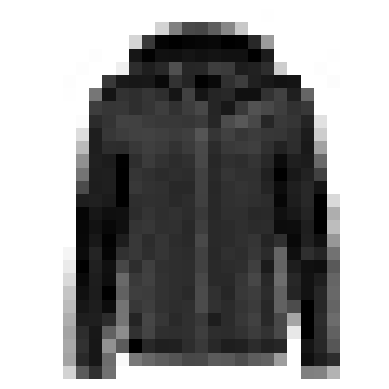

In [8]:
# 컬러로 출력할 때는 cmap 설정을 제거하면 됨
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

#### 레이블 생성

In [9]:
# 현재 레이블 = 숫자
print(y_train) #0 ~ 9
# 유저 입장에서는 숫자 보다는 문자열로 보여지는게 좋음
# 대표하는 이미지로 생성해두는 것도 좋
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_train[0]])

[4 0 7 ... 3 0 5]
Coat


#### 데이터 개수 확인

In [10]:
print('학습 데이터:', X_train_full.shape)
print('테스트 데이터:', X_test.shape)
print('검증 데이터:', X_valid.shape)

학습 데이터: (60000, 28, 28)
테스트 데이터: (10000, 28, 28)
검증 데이터: (5000, 28, 28)


#### 샘플 이미지 출력

그림 저장: fashion_mnist_plot


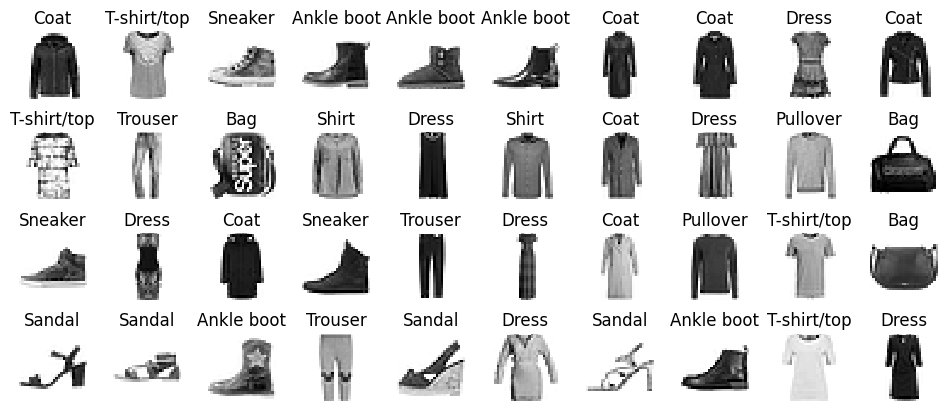

In [11]:
#행 개수
n_rows = 4
#열 개수
n_cols = 10
#캔버스 사이즈 걸정
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

#행 개수와 열 개수만큼 순회
for row in range(n_rows):
    for col in range(n_cols):
        # 행 번호와 열 번호를 가지고 인덱스를 생성
        index = n_cols * row + col
        # 캔버스 안에 작은 캔버스를 순서대로 생성
        plt.subplot(n_rows, n_cols, index + 1)
        # 캔버스에 이미지를 하나씩 출력
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        # plt는 출력할 때 축을 만들어주는데 축을 만들지 않도록 설정
        plt.axis('off')
        # 문자열 출력
        plt.title(class_names[y_train[index]], fontsize=12)
# 작은 캔버스들 사이에 여백을 설정
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# 로컬에 이미지로 저장하는 것 - 첫번째가 이미지 파일 명
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

#### Flatten Layer

In [13]:
print(f'변경전 shape: {X_train.shape}')
#reshape을 할 때 -1을 설정하면 나머지를 모두 설정하고 남은 것을 하나의 차원으로 생성
print(f'1D로 shape 변경 후: {X_train.reshape(55000, -1).shape}')

변경전 shape: (55000, 28, 28)
1D로 shape 변경 후: (55000, 784)


In [14]:
print(f'변경전 shape: {X_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(X_train).shape}')

변경전 shape: (55000, 28, 28)
Flatten 적용 후: (55000, 784)


#### 활성화 함수

In [15]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
# 뉴런의 개수가 128개인 relu를 활성화 함수로 사용하는 완전 연결 층을 생성
tf.keras.layers.Dense(128, activation='relu')

In [16]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
# Sequential API에 층을 추가하는 방법
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

#### 시퀀셜 API를 사용하여 모델 만들기

In [17]:
# 모델 생성
model = keras.models.Sequential()
# 입력 층 - 이미지의 경우는 1차원으로 변경하고 차원을 설정
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Hidden 층 - 이 층의 개수가 많아서 Deep Learning
# 개수 제한은 없으나 일반적으로 뉴런의 개수는 줄어드는 방향으로 설정 함
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# 출력 층
# 출력 층의 뉴런의 개수는 출력하는 데이터의 개수
# 분류는 클래스 개수이고 회귀는 1
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
#루프에서 많은 모델을 생성하는 경우이 전역 상태는 시간이 지남에 따라 증가하는 메모리를 소비하므로 이를 지울 수 있습니다.
#clear_session() 호출 하면 전역 상태가 해제됩니다.
#이는 특히 메모리가 제한된 경우 이전 모델 및 레이어의 혼란을 방지하는 데 도움이됩니다.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
#층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달해도 됨
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 모델을 이미지로 출력

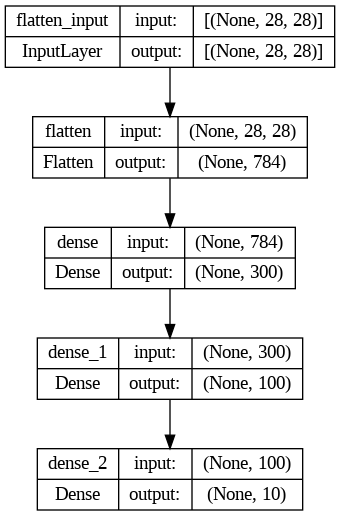

In [22]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

### 인덱스를 이용해서 층의 이름을 확인하기

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [24]:
model.get_layer(hidden1.name) is hidden1

True

### 파라미터 확인

In [25]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01554552, -0.04066708, -0.03037732, ..., -0.04711181,
        -0.01610734,  0.03738052],
       [-0.0173147 ,  0.06368648,  0.05159554, ..., -0.05536188,
        -0.05284169,  0.00148574],
       [-0.05339708,  0.07305984, -0.00027449, ..., -0.04226501,
         0.05746005, -0.04695816],
       ...,
       [ 0.03572409, -0.06237188,  0.07254195, ..., -0.03875973,
        -0.0718559 , -0.01329995],
       [ 0.06980285, -0.03403153,  0.06501962, ..., -0.01384012,
        -0.01898697,  0.04016902],
       [-0.06557809,  0.031765  ,  0.07121226, ..., -0.02954626,
        -0.05857795,  0.00626887]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

#### 손실 함수

In [29]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [30]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

#### 옵티마이저

In [31]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

In [32]:
# 문자열로 지정
model.compile(optimizer='adam')

#### 평가지표

In [33]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [34]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 모델 컴파일

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### 모델 훈련

In [36]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7162 - accuracy: 0.7631 - val_loss: 0.5207 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4893 - accuracy: 0.8282 - val_loss: 0.4384 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4435 - accuracy: 0.8434 - val_loss: 0.5162 - val_accuracy: 0.8042
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4166 - accuracy: 0.8531 - val_loss: 0.3975 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3976 - accuracy: 0.8607 - val_loss: 0.3829 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3788 - accuracy: 0.8670 - val_loss: 0.3748 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3664 - accuracy: 0.8702 - val_loss: 0.3666 - val_accuracy:

#### History 객체

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 학습 곡선

그림 저장: keras_learning_curves_plot


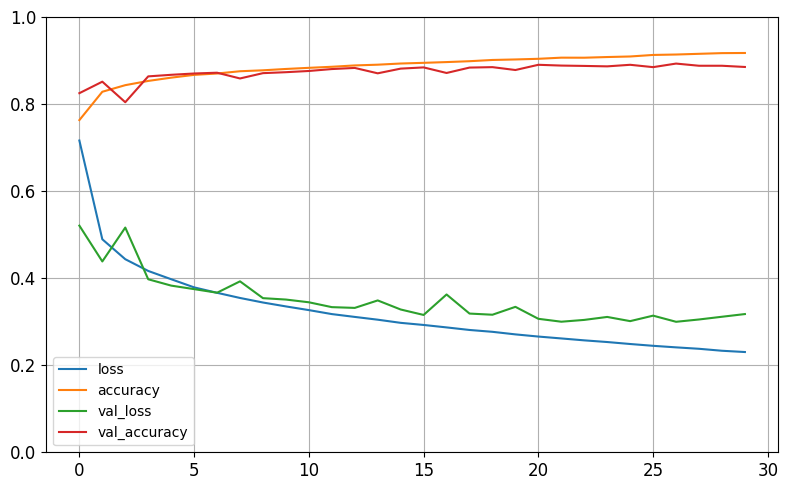

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

#### 일반화 오차

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8751


[0.3488222062587738, 0.8751000165939331]

#### 예측

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 163ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 28ms/step


array([9, 2, 1])

In [44]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

그림 저장: fashion_mnist_images_plot


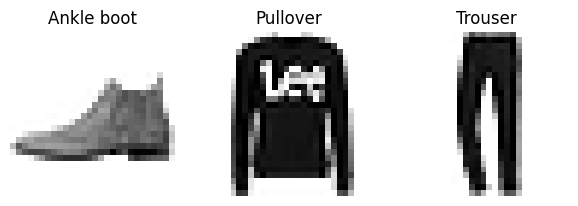

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### 회귀용 다층 퍼셉트론 만들기

#### 데이터 가져오기

In [56]:
#sklearn에서 캘리포니아 주택 가격 데이터 가져오기
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# 훈련 데이터, 검증 데이터, 테스트 데이터로 분
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

#### 모델 만들기

In [50]:
#모델 생성 - hidden 층 없이 생성
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

#잔차 제곱합을 손실 함수로 사용하고 옵티마이저는 경사 하강법
# 학습률은 0.003
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

# 모델 훈련 - 검증 데이터를 직접 설정했고 훈련 횟수는 20번
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# 평가
mse_test = model.evaluate(X_test, y_test)

#에
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7854 - val_loss: 8.8540
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5399 - val_loss: 7.0801
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5045 - val_loss: 0.6145
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4098 - val_loss: 0.3766
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4006 - val_loss: 0.3659
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3900 - val_loss: 0.3696
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3888 - val_loss: 0.3579
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3788 - val_loss: 0.3697
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3729 - val_loss: 0.3634
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3695 - val_loss: 0.5021

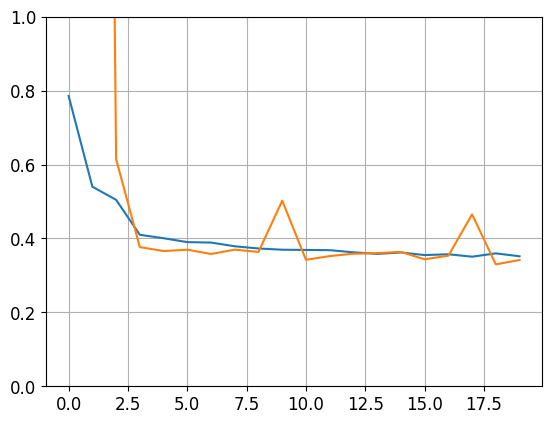

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
y_pred

array([[0.61194193],
       [1.7344404 ],
       [4.2993197 ]], dtype=float32)

### 함수형 API

#### 모델 만들기

In [53]:
np.random.seed(42)
tf.random.set_seed(42)
#입력 층 생성 - 입력 층은 unit이나 확성화 함수가 의미가 없음
input_ = keras.layers.Input(shape=X_train.shape[1:])
#input_ 다음에 연결되는 층을 생성
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

#hidden1의 출력을 입력으로 받는 층을 생성
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

#이 층은 input_ 나 hidden2의 출력을 입력으로 받는 층을 생성
#연결만 시켜주는 층이라서 뉴런의 개수나 활성화 함수는 의미가 없음
concat = keras.layers.concatenate([input_, hidden2])

#concat의 출력을 입력으로 받는 출력 층 생성
output = keras.layers.Dense(1)(concat)

#함수형 모델 생성 - inputs에 input 층을 outputs에 Output 층을 설정하면 됨
model = keras.models.Model(inputs=[input_], outputs=[output])

# 이 경우는 어떤 데이터가 짧은 경로로 전달되고 어떤 데이터가 전체경로를 타고 가는지 알 수 없음


#### 모델 확인

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

### 모델 훈련

In [55]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8702 - val_loss: 4.2583
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6056 - val_loss: 1.6730
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5487 - val_loss: 1.4324
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4321 - val_loss: 16.2164
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4278 - val_loss: 36.9765
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9724 - val_loss: 0.4769
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4788 - val_loss: 0.4921
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4358 - val_loss: 138.2005
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6633 - val_loss: 243.9180
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 4.5899 - val_loss: 

#### 짧은 경로로 보내기

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

#입력이 2개 - 입력 데이터를 두 묶음으로 나누어서 각각의 레이어로 전송
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

#input_B의 출력을 입력으로 사용
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
#hidden1의 출력을 입력으로 사용
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

#input_A의 출력과 hidden2의 출력을 하나로 묶어주는 층
concat = keras.layers.concatenate([input_A, hidden2])

#출력은 concat의 출력을 입력으로 받아서 처리
output = keras.layers.Dense(1, name="output")(concat)

#모델을 만들 때 2개의 입력을 사용하도록 설정 - fit을 할 때 훈련 데이터가 2개 필
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

#### 모델을 훈련

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

#입력 2개를 만들어야 하기 때문에 데이터를 다시 분
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 949us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4644 - val_loss: 0.43

#### 보조 출력 추가

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

#출력 층
output = keras.layers.Dense(1, name="main_output")(concat)
#출력 층
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

#보초 출력 추가하기
#입력이 2개 출력도 2
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

#### 보조 출력이 추가된 모델 컴파일

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

#### 모델 훈련

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

#### 모델 평가

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 882us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


### 상속(SubClassing)을 이용한 방식

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
      #__init__은 파이썬 클래스의 초기화 함수 - 생성자와 유사
      #__init__을 Overriding(재정의)할 때는 상위 클래스위 __init__을 반드시 호출
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    #모델이 수행할 동작을 가지는 메서드
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

#Model 인스턴스를 만들면 __init__에 작성한 내용이 자동으로 수행
model = WideAndDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

### 모델 저장 과 복원

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [ ]:
#모델 저장 - 현재 디렉토리에 저장 : 디렉토리에서 확
model.save("my_keras_model.h5")

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [ ]:
model.save_weights("weights.ckpt")

### 콜백

#### 모델 체크 포인트

In [ ]:
model.save_weights("my_keras_weights.ckpt")

In [ ]:
model.load_weights("my_keras_weights.ckpt")

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
#최적의 모델을 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#모델을 훈련시킬 때 콜백을 설정
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
#가장 좋은 모델을 복원
#포트폴리오를 만들 때는 이 코드를 꼭 입력해야 최상의 모델이 저장
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 970us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 800us/step - loss: 0.4382


#### 조기 종료

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
#조기종료
#patience 동안 loss가 줄어들지 않으면 훈련을 조기 중단하는 callback
#patience 값은 loss가 10번 정도 훈련을 했을 때 줄어들지 않으면 훈련을 멈추는
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 968us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 883us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 888us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 871us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 893us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 906us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 954us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 936us/step - loss:

363/363 [==============================] - 0s 985us/step - loss: 0.3329 - val_loss: 0.3353
Epoch 81/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3324 - val_loss: 0.3276
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3320 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3317 - val_loss: 0.3281
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3312 - val_loss: 0.3636
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3310 - val_loss: 0.3175
Epoch 86/100
363/363 [==============================] - 0s 998us/step - loss: 0.3308 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3305 - val_loss: 0.3532
Epoch 88/100
363/363 [==============================] - 0s 881us/step - loss: 0.3299 - val_loss: 0.3256
Epoch 89/100
363/363 [==============================] - 0s 889us/step - loss: 0.3294 - va

#### 학습률 스케줄러

In [ ]:
def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# 초기 학습률 확인(0.01)
print(round(model.optimizer.lr.numpy(), 5))

0.001


In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

# 최종 학습률 스케줄러 확인
round(model.optimizer.lr.numpy(), 5)

learning_rate: 0.00100
Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3302 - val_loss: 0.3559 - lr: 0.0010
learning_rate: 0.00100
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3301 - val_loss: 0.3303 - lr: 0.0010
learning_rate: 0.00100
Epoch 3/100
363/363 [==============================] - 0s 965us/step - loss: 0.3296 - val_loss: 0.3348 - lr: 0.0010
learning_rate: 0.00100
Epoch 4/100
363/363 [==============================] - 0s 969us/step - loss: 0.3295 - val_loss: 0.3142 - lr: 0.0010
learning_rate: 0.00100
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3291 - val_loss: 0.3366 - lr: 0.0010
learning_rate: 0.00100
Epoch 6/100
363/363 [==============================] - 0s 925us/step - loss: 0.3287 - val_loss: 0.3190 - lr: 9.0484e-04
learning_rate: 0.00090
Epoch 7/100
363/363 [==============================] - 0s 985us/step - loss: 0.3282 - val_loss: 0.3211 - lr: 8.1873e-04
learning_rate: 0.00082
Ep

363/363 [==============================] - 0s 826us/step - loss: 0.3248 - val_loss: 0.3276 - lr: 4.9916e-06
learning_rate: 0.00000
Epoch 59/100
363/363 [==============================] - 0s 830us/step - loss: 0.3248 - val_loss: 0.3277 - lr: 4.5166e-06
learning_rate: 0.00000
Epoch 60/100
363/363 [==============================] - 0s 835us/step - loss: 0.3248 - val_loss: 0.3277 - lr: 4.0868e-06
learning_rate: 0.00000
Epoch 61/100
363/363 [==============================] - 0s 899us/step - loss: 0.3248 - val_loss: 0.3277 - lr: 3.6979e-06
learning_rate: 0.00000
Epoch 62/100
363/363 [==============================] - 0s 830us/step - loss: 0.3248 - val_loss: 0.3277 - lr: 3.3460e-06
learning_rate: 0.00000
Epoch 63/100
363/363 [==============================] - 0s 829us/step - loss: 0.3248 - val_loss: 0.3277 - lr: 3.0276e-06
learning_rate: 0.00000
Epoch 64/100
363/363 [==============================] - 0s 825us/step - loss: 0.3248 - val_loss: 0.3277 - lr: 2.7394e-06
learning_rate: 0.00000
Epoch

0.0

#### 사용자 정의 콜백

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

291/363 [=======================>......] - ETA: 0s - loss: 0.3284
val/train: 1.01
363/363 [==============================] - 0s 913us/step - loss: 0.3247 - val_loss: 0.3277


### 텐서보드를 이용한 시각화

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_04_11-07_11_50'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

#텐서보드 저장
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 954us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 956us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 908us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 867us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 961us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 950us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 862us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 859us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 832us/step - loss: 0.4474 

#### 텐서보드 실행

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 5515), started 11:41:23 ago. (Use '!kill 5515' to kill it.)

In [ ]:
#스칼라, 히스토그램, 이미지, 오디오, 텍스트 기록
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # 몇몇 랜덤 데이터
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # 32x32 RGB 이미지
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [ ]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2022_04_11-07_12_09'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])


Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5530 - val_loss: 302.8466
Epoch 2/30
363/363 [==============================] - 0s 966us/step - loss: 63.6669 - val_loss: 0.9735
Epoch 3/30
363/363 [==============================] - 0s 884us/step - loss: 0.9411 - val_loss: 0.9599
Epoch 4/30
363/363 [==============================] - 0s 852us/step - loss: 0.9197 - val_loss: 0.8464
Epoch 5/30
363/363 [==============================] - 0s 916us/step - loss: 0.9819 - val_loss: 0.9281
Epoch 6/30
363/363 [==============================] - 0s 855us/step - loss: 0.9240 - val_loss: 0.9089
Epoch 7/30
363/363 [==============================] - 0s 914us/step - loss: 0.9179 - val_loss: 0.8815
Epoch 8/30
363/363 [==============================] - 0s 860us/step - loss: 0.8950 - val_loss: 0.9007
Epoch 9/30
363/363 [==============================] - 0s 894us/step - loss: 0.9150 - val_loss: 0.8734
Epoch 10/30
363/363 [==============================] - 0s 862us/step - loss: 0.89

### 신경망 하이퍼파라미터 튜닝

#### 함수 생성

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

#### 객체 생성

In [ ]:
! pip install scikeras

from scikeras.wrappers import KerasRegressor

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#### 모델 훈련

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 813us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 863us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 865us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 837us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 1000us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 932us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 576us/step - loss: 0.3412


In [ ]:
y_pred = keras_reg.predict(X_new)

### 하이퍼 파라미터 튜닝

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 843us/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 931us/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 854us/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 0s 839us/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 931us/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 839us/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 875us/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 866us/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
2

Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3746 - val_loss: 0.6750
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3678 - val_loss: 0.8462
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3610 - val_loss: 0.8724
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3554 - val_loss: 0.9645
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3525 - val_loss: 0.7225
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3475 - val_loss: 0.7257
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3442 - val_loss: 0.7216
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3422 - val_loss: 0.8440
Epoch 14/100
121/121 [==============================] - 0s 602us/step - loss: 0.3650
[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=   4.2s
Epoch 1/100
2

242/242 [==============================] - 0s 883us/step - loss: 0.5614 - val_loss: 0.5214
Epoch 26/100
242/242 [==============================] - 0s 874us/step - loss: 0.5558 - val_loss: 0.5166
Epoch 27/100
242/242 [==============================] - 0s 918us/step - loss: 0.5504 - val_loss: 0.5116
Epoch 28/100
242/242 [==============================] - 0s 887us/step - loss: 0.5453 - val_loss: 0.5076
Epoch 29/100
242/242 [==============================] - 0s 885us/step - loss: 0.5403 - val_loss: 0.5035
Epoch 30/100
242/242 [==============================] - 0s 977us/step - loss: 0.5356 - val_loss: 0.4989
Epoch 31/100
242/242 [==============================] - 0s 891us/step - loss: 0.5309 - val_loss: 0.4946
Epoch 32/100
242/242 [==============================] - 0s 885us/step - loss: 0.5265 - val_loss: 0.4915
Epoch 33/100
242/242 [==============================] - 0s 877us/step - loss: 0.5222 - val_loss: 0.4883
Epoch 34/100
242/242 [==============================] - 0s 886us/step - loss:

242/242 [==============================] - 0s 886us/step - loss: 0.6814 - val_loss: 2.6082
Epoch 13/100
242/242 [==============================] - 0s 896us/step - loss: 0.6701 - val_loss: 2.2766
Epoch 14/100
242/242 [==============================] - 0s 880us/step - loss: 0.6593 - val_loss: 1.9984
Epoch 15/100
242/242 [==============================] - 0s 873us/step - loss: 0.6491 - val_loss: 1.7447
Epoch 16/100
242/242 [==============================] - 0s 887us/step - loss: 0.6395 - val_loss: 1.5300
Epoch 17/100
242/242 [==============================] - 0s 939us/step - loss: 0.6303 - val_loss: 1.3410
Epoch 18/100
242/242 [==============================] - 0s 903us/step - loss: 0.6217 - val_loss: 1.1762
Epoch 19/100
242/242 [==============================] - 0s 875us/step - loss: 0.6133 - val_loss: 1.0345
Epoch 20/100
242/242 [==============================] - 0s 876us/step - loss: 0.6055 - val_loss: 0.9174
Epoch 21/100
242/242 [==============================] - 0s 871us/step - loss:

242/242 [==============================] - 0s 899us/step - loss: 0.4716 - val_loss: 0.4468
Epoch 52/100
242/242 [==============================] - 0s 934us/step - loss: 0.4693 - val_loss: 0.4446
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4670 - val_loss: 0.4420
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4649 - val_loss: 0.4394
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4628 - val_loss: 0.4373
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4607 - val_loss: 0.4349
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 0.4330
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4569 - val_loss: 0.4311
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4550 - val_loss: 0.4291
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4532 - val_lo

242/242 [==============================] - 0s 1ms/step - loss: 0.3607 - val_loss: 0.3792
Epoch 30/100
242/242 [==============================] - 0s 1000us/step - loss: 0.3602 - val_loss: 0.3636
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3576 - val_loss: 0.3476
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3566 - val_loss: 0.3566
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3548 - val_loss: 0.3611
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3541 - val_loss: 0.3414
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3527 - val_loss: 0.3474
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3508 - val_loss: 0.3944
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3507 - val_loss: 0.4402
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3502 - val_los

242/242 [==============================] - 0s 2ms/step - loss: 0.4188 - val_loss: 0.4250
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4121 - val_loss: 0.4009
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4067 - val_loss: 0.4403
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4025 - val_loss: 0.4014
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3981 - val_loss: 0.4247
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3946 - val_loss: 0.3964
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3914 - val_loss: 0.3974
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3887 - val_loss: 0.4229
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3860 - val_loss: 0.4053
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3840 - val_loss: 

Epoch 15/100
242/242 [==============================] - 0s 788us/step - loss: 2.2300 - val_loss: 1073.9153
Epoch 16/100
242/242 [==============================] - 0s 799us/step - loss: 37.3801 - val_loss: 865.6381
Epoch 17/100
242/242 [==============================] - 0s 783us/step - loss: 8.9708 - val_loss: 1128.1495
Epoch 18/100
242/242 [==============================] - 0s 790us/step - loss: 3.8291 - val_loss: 499.5188
Epoch 19/100
242/242 [==============================] - 0s 788us/step - loss: 24.8681 - val_loss: 309.7941
Epoch 20/100
242/242 [==============================] - 0s 775us/step - loss: 3.6469 - val_loss: 354.6341
Epoch 21/100
242/242 [==============================] - 0s 786us/step - loss: 4.2841 - val_loss: 559.4487
Epoch 22/100
121/121 [==============================] - 0s 518us/step - loss: 0.6226
[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=   5.4s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.263

242/242 [==============================] - 0s 1ms/step - loss: 0.3279 - val_loss: 0.3637
Epoch 33/100
242/242 [==============================] - 0s 977us/step - loss: 0.3271 - val_loss: 0.3467
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3243 - val_loss: 0.3582
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3245 - val_loss: 0.3141
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3223 - val_loss: 0.3636
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3220 - val_loss: 0.3376
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3212 - val_loss: 0.5255
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3230 - val_loss: 0.3313
Epoch 40/100
242/242 [==============================] - 0s 973us/step - loss: 0.3194 - val_loss: 0.4033
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3181 - val_lo

242/242 [==============================] - 0s 890us/step - loss: 0.3944 - val_loss: 0.3779
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3925 - val_loss: 0.4126
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3910 - val_loss: 0.3967
Epoch 29/100
242/242 [==============================] - 0s 952us/step - loss: 0.3889 - val_loss: 0.4045
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3880 - val_loss: 0.3748
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3864 - val_loss: 0.3717
Epoch 32/100
242/242 [==============================] - 0s 944us/step - loss: 0.3851 - val_loss: 0.3676
Epoch 33/100
242/242 [==============================] - 0s 897us/step - loss: 0.3837 - val_loss: 0.4054
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3825 - val_loss: 0.3924
Epoch 35/100
242/242 [==============================] - 0s 994us/step - loss: 0.3815 - 

242/242 [==============================] - 0s 957us/step - loss: 0.3741 - val_loss: 0.7508
Epoch 45/100
121/121 [==============================] - 0s 593us/step - loss: 0.3745
[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=  11.6s
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.0682 - val_loss: 6.4183
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7154 - val_loss: 16.7917
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5830 - val_loss: 4.7824
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4475 - val_loss: 8.6078
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4779 - val_loss: 1.8032
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.3655
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3682 - val_loss: 0.3783
Epoch 8/100
242/242 [====

Epoch 78/100
121/121 [==============================] - 0s 619us/step - loss: 0.3093
[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=  21.4s
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.8717 - val_loss: 0.7369
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5007 - val_loss: 0.4431
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4272 - val_loss: 0.3919
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3961 - val_loss: 0.3834
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3777 - val_loss: 0.3951
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3661 - val_loss: 0.4650
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3580 - val_loss: 0.6408
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3524 - val_loss: 0.7273
Epoch 9/100
242/2

242/242 [==============================] - 0s 1ms/step - loss: 0.3914 - val_loss: 0.3693
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3713 - val_loss: 0.3554
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3601 - val_loss: 0.3874
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3523 - val_loss: 0.3635
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3454 - val_loss: 0.3985
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3410 - val_loss: 0.3793
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3381 - val_loss: 0.3706
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3350 - val_loss: 0.3313
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3304 - val_loss: 0.3509
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3269 - val_loss: 0.379

242/242 [==============================] - 0s 1ms/step - loss: 0.3511 - val_loss: 0.3323
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3445 - val_loss: 0.4228
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3420 - val_loss: 0.3283
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3375 - val_loss: 0.3463
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3337 - val_loss: 0.4041
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3326 - val_loss: 0.3275
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3291 - val_loss: 0.3800
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3263 - val_loss: 0.3212
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3228 - val_loss: 0.3300
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3216 - val_loss: 

Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3052 - val_loss: 0.3061
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3034 - val_loss: 0.3104
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3032 - val_loss: 0.3363
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3042 - val_loss: 0.2997
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3014 - val_loss: 0.3759
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3035 - val_loss: 0.3257
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3001 - val_loss: 0.2981
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2991 - val_loss: 0.3213
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2997 - val_loss: 0.3224
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2982

363/363 [==============================] - 1s 1ms/step - loss: 0.8194 - val_loss: 1.8036
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4857 - val_loss: 2.0827
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4266 - val_loss: 0.3796
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3857 - val_loss: 0.4283
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3740 - val_loss: 0.3617
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3620 - val_loss: 0.4566
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3566 - val_loss: 0.3573
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3492 - val_loss: 0.3380
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3432 - val_loss: 0.3757
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3389 - val_loss: 0.4069
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f8d38600f70>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00502142573

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [ ]:
rnd_search_cv.best_score_

-0.31833014885584515

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 849us/step - loss: 0.3029


-0.30288204550743103

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 666us/step - loss: 0.3029


0.30288204550743103

## 그라디언트 소실과 폭주 문제

### 로지스틱 함수의 수렴

In [ ]:
def logit(z):
    return 1 / (1 + np.exp(-z))

그림 저장: sigmoid_saturation_plot


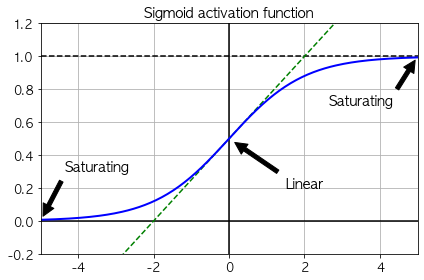

In [ ]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

### 글로럿 과 He 초기화

In [ ]:
#모든 초기화 방식을 확인
[name for name in dir(keras.initializers) if not name.startswith("_")]

#글로럿 초기화
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")


#균등분포 He 초기화
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

### 활성화 함수

#### LeakyReLU

그림 저장: leaky_relu_plot


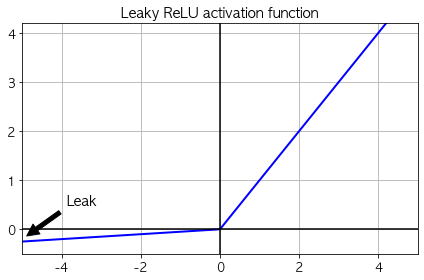

In [ ]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

#### LeakyReLU를 사용해 패션 MNIST에서 신경망을 훈련

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#모델 생성
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

#모델 컴파일
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8198
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5156 - val_accuracy:

#### PReLU

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8197 - accuracy: 0.7356 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5618 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5390 - accuracy: 0.8206 - val_loss: 0.5196 - val_accuracy:

#### elu

그림 저장: elu_plot


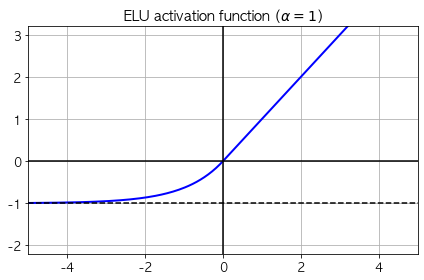

In [ ]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [ ]:
#TensorFlow에서 쉽게 ELU를 적용할 수 있는데 층을 만들 때 활성화 함수로 지정
keras.layers.Dense(10, activation="elu")

#### SELU

In [ ]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

그림 저장: selu_plot


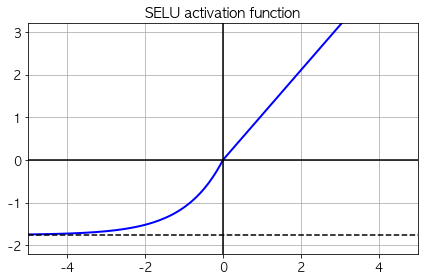

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [ ]:
#기본적으로 SELU 하이퍼 파라미터(scale과 alpha)는 각 뉴런의 평균 출력이 0에 가깝고 표준 편차는 1에 가깝도록 조정
#입력은 평균이 0이고 표준 편차 1로 표준화 되었다고 가정
#이 활성화 함수를 사용하면 1,000개의 층이 있는 심층 신경망도 모든 층에 걸쳐 거의 평균이 0이고 표준 편차를 1로 유지
#이를 통해 그라디언트 폭주와 소실 문제를 피할 수 있음

np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))


Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [ ]:
#은닉층에 적용
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

#### SELU를 패션 MNIST에 적용

In [ ]:

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 19s 10ms/step - loss: 1.3761 - accuracy: 0.4486 - val_loss: 1.0573 - val_accuracy: 0.5834
Epoch 2/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.9228 - accuracy: 0.6520 - val_loss: 0.7754 - val_accuracy: 0.7164
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 1.0013 - accuracy: 0.6198 - val_loss: 0.7810 - val_accuracy: 0.6986
Epoch 4/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8213 - accuracy: 0.6780 - val_loss: 1.1074 - val_accuracy: 0.5432
Epoch 5/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.7920 - accuracy: 0.6851 - val_loss: 0.7174 - val_accuracy: 0.7114


In [ ]:
#ReLU를 사용한 경우
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 15s 8ms/step - loss: 1.8238 - accuracy: 0.2625 - val_loss: 1.2631 - val_accuracy: 0.4612
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 1.1897 - accuracy: 0.4893 - val_loss: 1.1803 - val_accuracy: 0.4824
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 1.0207 - accuracy: 0.5663 - val_loss: 0.8560 - val_accuracy: 0.6128
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.9286 - accuracy: 0.6224 - val_loss: 0.8706 - val_accuracy: 0.6734
Epoch 5/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.8426 - accuracy: 0.6693 - val_loss: 0.7579 - val_accuracy: 0.7342


### 배치 정규화

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_302 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_303 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)            

#### 첫번째 배치 정규화 층 파라미터 확인

In [ ]:
#파라미터 확인
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5753 - accuracy: 0.8029 - val_loss: 0.4724 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5189 - accuracy: 0.8205 - val_loss: 0.4375 - val_accuracy: 0.8550
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4827 - accuracy: 0.8322 - val_loss: 0.4152 - val_accuracy: 0.8604
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4565 - accuracy: 0.8407 - val_loss: 0.3997 - val_accuracy: 0.8638
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4398 - accuracy: 0.8472 - val_loss: 0.3866 - val_accuracy: 0.8700
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4242 - accuracy: 0.8513 - val_loss: 0.3762 - val_accuracy:

#### 활성화 전에 BN 적용

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8364
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5447 - accuracy: 0.8191 - val_loss: 0.4666 - val_accuracy: 0.8452
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5109 - accuracy: 0.8280 - val_loss: 0.4433 - val_accuracy: 0.8532
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4898 - accuracy: 0.8339 - val_loss: 0.4262 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4712 - accuracy: 0.8397 - val_loss: 0.4130 - val_accuracy:

## 사전 훈련

### 사전 훈련된 모델 사용

#### 데이터 셋 분할

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
X_train_A.shape

(43986, 28, 28)

In [ ]:
X_train_B.shape

(200, 28, 28)

In [ ]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

#### 모델 A 생성

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5926 - accuracy: 0.8103 - val_loss: 0.3894 - val_accuracy: 0.8670
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8787 - val_loss: 0.3289 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8894 - val_loss: 0.3014 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2972 - accuracy: 0.8973 - val_loss: 0.2891 - val_accuracy: 0.9018
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9022 - val_loss: 0.2774 - val_accuracy: 0.9068
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9061 - val_loss: 0.2732 - val_accuracy: 0.9066
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2718 - val_accuracy:

#### 모델 저장

In [ ]:
model_A.save("my_model_A.h5")

#### 모델 B 생성 및 훈련

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 30ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

#### 모델 B 확인

In [ ]:
model_B.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_314 (Dense)           (None, 300)               235500    
                                                                 
 dense_315 (Dense)           (None, 100)               30100     
                                                                 
 dense_316 (Dense)           (None, 50)                5050      
                                                                 
 dense_317 (Dense)           (None, 50)                2550      
                                                                 
 dense_318 (Dense)           (None, 50)                2550      
                                                                 
 dense_319 (Dense)           (None, 1)               

#### 모델 B 에서 모델 A를 재사용

In [ ]:
# 모델 B 에서 모델 A를 재사용
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 27ms/step - loss: 0.5779 - accuracy: 0.6500 - val_loss: 0.5830 - val_accuracy: 0.6349
Epoch 2/4
7/7 [==============================] - 0s 12ms/step - loss: 0.5415 - accuracy: 0.6800 - val_loss: 0.5457 - val_accuracy: 0.6805
Epoch 3/4
7/7 [==============================] - 0s 11ms/step - loss: 0.5048 - accuracy: 0.7300 - val_loss: 0.5137 - val_accuracy: 0.7089
Epoch 4/4
7/7 [==============================] - 0s 9ms/step - loss: 0.4734 - accuracy: 0.7500 - val_loss: 0.4851 - val_accuracy: 0.7353


In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 30ms/step - loss: 0.3951 - accuracy: 0.8200 - val_loss: 0.3459 - val_accuracy: 0.8661
Epoch 2/16
7/7 [==============================] - 0s 13ms/step - loss: 0.2793 - accuracy: 0.9350 - val_loss: 0.2604 - val_accuracy: 0.9290
Epoch 3/16
7/7 [==============================] - 0s 11ms/step - loss: 0.2080 - accuracy: 0.9650 - val_loss: 0.2110 - val_accuracy: 0.9554
Epoch 4/16
7/7 [==============================] - 0s 10ms/step - loss: 0.1667 - accuracy: 0.9800 - val_loss: 0.1791 - val_accuracy: 0.9696
Epoch 5/16
7/7 [==============================] - 0s 17ms/step - loss: 0.1394 - accuracy: 0.9800 - val_loss: 0.1562 - val_accuracy: 0.9757
Epoch 6/16
7/7 [==============================] - 0s 11ms/step - loss: 0.1195 - accuracy: 0.9950 - val_loss: 0.1394 - val_accuracy: 0.9807
Epoch 7/16
7/7 [==============================] - 0s 11ms/step - loss: 0.1049 - accuracy: 0.9950 - val_loss: 0.1267 - val_accuracy: 0.9838
Epoch 8/16
7/7 [===========

#### 마지막 점수

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407986164093, 0.9704999923706055]

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407986164093, 0.9704999923706055]

In [ ]:
#마지막 점수
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9935


[0.06820797920227051, 0.9934999942779541]

In [ ]:
(100 - 97.05) / (100 - 99.35)

4.538461538461503

## 고속 옵티마이저

### AdaGrad 적용

In [ ]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### Adam

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### Nadam

In [ ]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## 학습률 스케줄링

### 거듭 제곱 스케줄링

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4855 - accuracy: 0.8304 - val_loss: 0.4032 - val_accuracy: 0.8592
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3781 - accuracy: 0.8657 - val_loss: 0.3715 - val_accuracy: 0.8730
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3458 - accuracy: 0.8770 - val_loss: 0.3747 - val_accuracy: 0.8748
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3251 - accuracy: 0.8831 - val_loss: 0.3504 - val_accuracy: 0.8796
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8893 - val_loss: 0.3449 - val_accuracy: 0.8790
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2967 - accuracy: 0.8934 - val_loss: 0.3417 - val_accuracy: 0.8832
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2869 - accuracy: 0.8973 - val_loss: 0.3356 - val_accuracy:

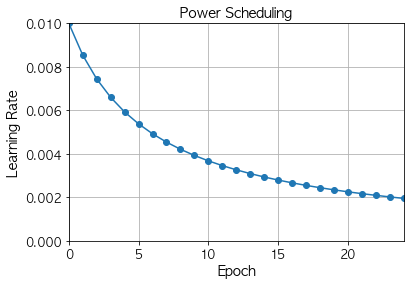

In [ ]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### 지수 기반 스케줄링

In [ ]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8580 - accuracy: 0.7527 - val_loss: 0.9910 - val_accuracy: 0.7260 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7331 - accuracy: 0.7804 - val_loss: 0.5900 - val_accuracy: 0.8080 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6590 - accuracy: 0.7970 - val_loss: 0.7090 - val_accuracy: 0.7762 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5470 - accuracy: 0.8260 - val_loss: 0.5441 - val_accuracy: 0.8478 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5437 - accuracy: 0.8322 - val_loss: 0.5150 - val_accuracy: 0.8540 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4735 - accuracy: 0.8481 - val_loss: 0.4947 - val_accuracy: 0.8520 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 6s

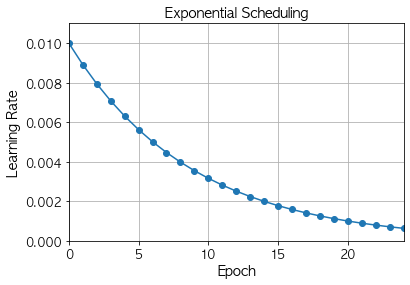

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8280 - accuracy: 0.7627 - val_loss: 0.7708 - val_accuracy: 0.7628 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6761 - accuracy: 0.7989 - val_loss: 0.5581 - val_accuracy: 0.8214 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5906 - accuracy: 0.8250 - val_loss: 0.7392 - val_accuracy: 0.7728 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5423 - accuracy: 0.8371 - val_loss: 0.5538 - val_accuracy: 0.8460 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4915 - accuracy: 0.8502 - val_loss: 0.4889 - val_accuracy: 0.8518 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4242 - accuracy: 0.8656 - val_loss: 0.4841 - val_accuracy: 0.8568 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 6s

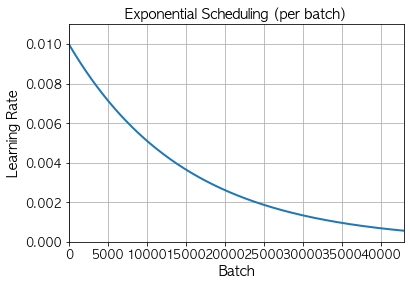

In [ ]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

## 규제

### l2 규제

In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6253 - accuracy: 0.8116 - val_loss: 0.7192 - val_accuracy: 0.8300
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7189 - accuracy: 0.8274 - val_loss: 0.6832 - val_accuracy: 0.8364


### 가독성 높이기

In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6192 - accuracy: 0.8112 - val_loss: 0.7174 - val_accuracy: 0.8326
Epoch 2/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7200 - accuracy: 0.8269 - val_loss: 0.6815 - val_accuracy: 0.8390


### Dropout

#### 그대로 전달

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5676 - accuracy: 0.8032 - val_loss: 0.3677 - val_accuracy: 0.8672
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4191 - accuracy: 0.8453 - val_loss: 0.3507 - val_accuracy: 0.8712


#### 알파 드롭아웃

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6617 - accuracy: 0.7611 - val_loss: 0.5777 - val_accuracy: 0.8410
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5548 - accuracy: 0.7967 - val_loss: 0.5407 - val_accuracy: 0.8474
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5256 - accuracy: 0.8059 - val_loss: 0.5011 - val_accuracy: 0.8550
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5050 - accuracy: 0.8129 - val_loss: 0.4770 - val_accuracy: 0.8602
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4927 - accuracy: 0.8176 - val_loss: 0.4640 - val_accuracy: 0.8616
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4839 - accuracy: 0.8201 - val_loss: 0.4858 - val_accuracy: 0.8570
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4716 - accuracy: 0.8250 - val_loss: 0.5099 - val_accuracy:

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.8592


[0.46625688672065735, 0.8592000007629395]

In [ ]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.3425 - accuracy: 0.8829


[0.34249722957611084, 0.8829454779624939]

In [ ]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.4201 - accuracy: 0.8430


#### 몬테 카를로 Dropout

In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

tf.random.set_seed(42)
np.random.seed(42)

mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

mc_model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_340 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_341 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

mc_model.set_weights(model.get_weights())

np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.29, 0.  , 0.58]],
      dtype=float32)

#### 맥스 노름 규제

In [ ]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4744 - accuracy: 0.8334 - val_loss: 0.3778 - val_accuracy: 0.8638
Epoch 2/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3541 - accuracy: 0.8722 - val_loss: 0.3726 - val_accuracy: 0.8670


## 사용자 정의 모델

### 사용자 정의 손실 함수

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 후버 손실 함수
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)


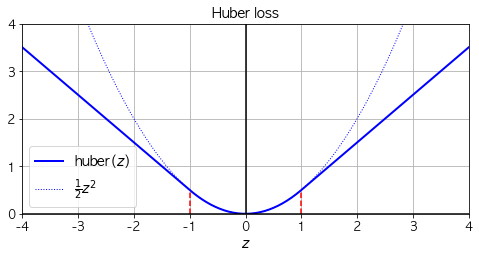

In [ ]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [ ]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.5887 - mae: 0.9436 - val_loss: 0.2080 - val_mae: 0.4985
Epoch 2/2
363/363 [==============================] - 0s 985us/step - loss: 0.2091 - mae: 0.5037 - val_loss: 0.1924 - val_mae: 0.4774


In [ ]:
model.save("my_model_with_a_custom_loss.h5")

model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2006 - mae: 0.4915 - val_loss: 0.1857 - val_mae: 0.4658
Epoch 2/2
363/363 [==============================] - 0s 999us/step - loss: 0.1960 - mae: 0.4849 - val_loss: 0.1807 - val_mae: 0.4617


### 손실 함수 수정

In [ ]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [ ]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2177 - mae: 0.4841 - val_loss: 0.1973 - val_mae: 0.4559
Epoch 2/2
363/363 [==============================] - 0s 989us/step - loss: 0.2131 - mae: 0.4794 - val_loss: 0.2217 - val_mae: 0.4738


In [ ]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2120 - mae: 0.4773 - val_loss: 0.1911 - val_mae: 0.4496
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2077 - mae: 0.4724 - val_loss: 0.2272 - val_mae: 0.4736


### keras.losses.Loss 클래스를 상속

In [ ]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.9248 - mae: 1.0144 - val_loss: 0.5820 - val_mae: 0.6739
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2595 - mae: 0.5176 - val_loss: 0.4620 - val_mae: 0.6070


In [ ]:
model.save("my_model_with_a_custom_loss_class.h5")

model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2403 - mae: 0.5013 - val_loss: 0.3364 - val_mae: 0.5325
Epoch 2/2
363/363 [==============================] - 0s 977us/step - loss: 0.2291 - mae: 0.4922 - val_loss: 0.2557 - val_mae: 0.4985


In [ ]:
model.loss.threshold

2.0

### 활성화 함수, 초기화, 규제, 제한을 커스터마이징

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def my_softplus(z): # tf.nn.softplus(z) 값을 반환합니다
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # tf.nn.relu(weights) 값을 반환합니다
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [ ]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [ ]:
model.save("my_model_with_many_custom_parts.h5")

model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })


#### 상속 이용

In [ ]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.5901 - mae: 0.8871 - val_loss: 1.4671 - val_mae: 0.5719
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.6168 - mae: 0.5327 - val_loss: 1.3017 - val_mae: 0.5177


In [ ]:
model.save("my_model_with_many_custom_parts.h5")

model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })


### 사용자 정의 지표

#### 후버 함수

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

model.fit(X_train_scaled, y_train, epochs=2)


Epoch 1/2
363/363 [==============================] - 1s 756us/step - loss: 2.4099 - huber_fn: 0.8630
Epoch 2/2
363/363 [==============================] - 0s 750us/step - loss: 0.7635 - huber_fn: 0.2597


#### precision = keras.metrics.Precision()

In [ ]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [ ]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

#### 스트리밍 지표

In [ ]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # 기본 매개변수 처리 (예를 들면, dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [ ]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))


<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [ ]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [ ]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [ ]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 785us/step - loss: 0.8707 - huber_metric: 0.8707
Epoch 2/2
363/363 [==============================] - 0s 783us/step - loss: 0.2595 - huber_metric: 0.2595


In [ ]:
model.save("my_model_with_a_custom_metric.h5")

model = keras.models.load_model("my_model_with_a_custom_metric.h5",
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})

model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 819us/step - loss: 0.2350 - huber_metric: 0.2350
Epoch 2/2
363/363 [==============================] - 0s 733us/step - loss: 0.2278 - huber_metric: 0.2278


In [ ]:
model.metrics[-1].threshold

2.0

#### 간단하게 작성

In [ ]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

### 사용자 정의 층

#### 지수를 사용하는 층

In [ ]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

exponential_layer([-1., 0., 1.])

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 959us/step - loss: 1.0631 - val_loss: 0.4457
Epoch 2/5
363/363 [==============================] - 0s 841us/step - loss: 0.4562 - val_loss: 0.3798
Epoch 3/5
363/363 [==============================] - 0s 893us/step - loss: 0.4029 - val_loss: 0.3548
Epoch 4/5
363/363 [==============================] - 0s 851us/step - loss: 0.3851 - val_loss: 0.3464
Epoch 5/5
162/162 [==============================] - 0s 772us/step - loss: 0.3586


0.3586341440677643

#### 상태가 있는 층

In [ ]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 631us/step - loss: 0.5474


0.5473727583885193

In [ ]:
model.save("my_model_with_a_custom_layer.h5")
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

NotImplementedError: 
Layer MyDense has arguments ['self', 'units', 'activation']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [ ]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))


In [ ]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [ ]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4904 - val_loss: 0.5329
Epoch 2/2
162/162 [==============================] - 0s 579us/step - loss: 0.3990


0.39900389313697815

### 사용자 정의 모델

In [ ]:
X_new_scaled = X_test_scaled

class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [ ]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)


Epoch 1/5
363/363 [==============================] - 2s 1ms/step - loss: 9.1325
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 1.0579
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8868
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5836
Epoch 5/5
162/162 [==============================] - 0s 755us/step - loss: 0.6496


In [ ]:
model.save("my_custom_model.ckpt")

model = keras.models.load_model("my_custom_model.ckpt")

history = model.fit(X_train_scaled, y_train, epochs=5)

2022-04-11 09:12:31.551982: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7997
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5026
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5639
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4544
Epoch 5/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5597
